In [1]:
from agents.matchmanager import MatchManager

from itertools import product

from agents import GreedyAgent, AlphaBetaAgent, RandomAgent
from scenarios import scenarioJunction, scenarioJunctionExo, scenarioTest1v1, scenarioTest2v2
from core.const import RED, BLUE
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
def createDf(output):
    agents = ['RandomAgent','Regressor','GreedyAgent']
    scenarios = ['Junction','JunctionExo']
    all_json=[]
    for i in range(0, 100):
        for s in scenarios:
            for agentRed, agentBlue in product(agents, agents):
                file_name=f'{output}/{agentRed}_{agentBlue}_{s}_{i}.json'
                data=json.load(open(file_name))
                all_json.append(data)  
    df=pd.DataFrame(all_json)
    return df

In [3]:
def addWinnerColumn(df):
    winner_agent=[]
    for i in range(len(df)):
        if ((df["teamRed"][i] == "Regressor") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "Regressor") & (df["winner"][i]=="blue")):
            winner_agent.append("Regressor")
        elif ((df["teamRed"][i] == "RandomAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "RandomAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("RandomAgent")
        elif ((df["teamRed"][i] == "GreedyAgent") & (df["winner"][i]=="red")) | ((df["teamBlue"][i] == "GreedyAgent") & (df["winner"][i]=="blue")):
            winner_agent.append("GreedyAgent")
    return winner_agent


In [4]:
def matchesWonForEachAgent(df):
    print("PERCENTUALI GENERALI")
    df['winnerAgent'].value_counts().plot.bar(title='games won for each agent')
    print('Percentuale vincita Regressor:',len(df[df['winnerAgent']=="Regressor"])/len(df))
    print('Percentuale vincita RandomAgent:',len(df[df['winnerAgent']=="RandomAgent"])/len(df))
    print('Percentuale vincita GreedyAgent:',len(df[df['winnerAgent']=="GreedyAgent"])/len(df))

In [5]:
def agentVSagent(df,agent1,agent2):
    print("AGENTE VS AGENTE")
    mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))|((df.teamRed == agent2) & (df.teamBlue == agent1))]
    #mask['winnerAgent'].value_counts().plot.bar(title=f'Vincita {agent1} su {agent2}')
    print(f'Percentuale vincita {agent1} su {agent2}:',len(mask[mask['winnerAgent']==agent1])/len(mask))
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        #devi fare groupby su colonna winner, poi fai il count e dividi sul totale
        sns.barplot(y=((dd['winnerAgent'].value_counts())/len(dd))*100,x=dd['winnerAgent'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(f'Percentuale vincita {agent1} su {agent2} su scenario {name}:',len(dd[dd['winnerAgent']==agent1])/len(dd))

    plt.plot() 
    #plotta percentuali-> fai solo scenario junction (nel caso junctionexo)


In [6]:
def agentVSagentColor(df,agent1,agent2,coloragent1):
    print("AGENTE VS AGENTE PER COLORE")
    if (coloragent1=="red"):
        mask=df.loc[((df.teamRed == agent1) & (df.teamBlue == agent2))]
        print(f'Percentuale vincita {agent1} Red su {agent2} Blue:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Red su {agent2} Blue su scenario '
    else:
        mask=df.loc[((df.teamRed == agent2) & (df.teamBlue == agent1))]
        print(f'Percentuale vincita {agent1} Blue su {agent2} Red:',len(mask[mask['winner']==coloragent1])/len(mask))
        title=f'Percentuale vincita {agent1} Blue su {agent2} Red su scenario '

        
    departments=mask['scenario'].unique()

    fig, ax = plt.subplots(ncols=len(departments),nrows=1, figsize=(16,8))
    for i,name in enumerate(departments):
        dd=mask[(mask.scenario == name)]
        sns.barplot(y=((dd['winner'].value_counts())/len(dd))*100,x=dd['winner'].unique() ,ax=ax[i])
        ax[i].set_ylabel('Percentuale vittoria')
        ax[i].set(ylim=(0, 100))
        ax[i].set_title('scenario - {}'.format(name), fontsize=10)
        print(title,name,len(dd[dd['winner']==coloragent1])/len(dd))

    plt.plot() 
    #metti perncetuale per ogni scenario



In [7]:
dfAll=createDf("outputRegressor")
dfAll["winnerAgent"]=addWinnerColumn(dfAll)

In [8]:
dfGreedy=createDf("outputRegressorAllData")
dfGreedy["winnerAgent"]=addWinnerColumn(dfGreedy)

In [9]:
dfGreedyRandom=createDf("outputRegressorRandomGreedy")
dfGreedyRandom["winnerAgent"]=addWinnerColumn(dfGreedyRandom)

PERCENTUALI GENERALI
Percentuale vincita Regressor: 0.24444444444444444
Percentuale vincita RandomAgent: 0.26166666666666666
Percentuale vincita GreedyAgent: 0.4938888888888889
AGENTE VS AGENTE
Percentuale vincita Regressor su RandomAgent: 0.4925
Percentuale vincita Regressor su RandomAgent su scenario Junction: 0.485
Percentuale vincita Regressor su RandomAgent su scenario JunctionExo: 0.5
AGENTE VS AGENTE
Percentuale vincita Regressor su GreedyAgent: 0.1075
Percentuale vincita Regressor su GreedyAgent su scenario Junction: 0.09
Percentuale vincita Regressor su GreedyAgent su scenario JunctionExo: 0.125
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Red su RandomAgent Blue: 0.025
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  Junction 0.03
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  JunctionExo 0.02
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Blue su RandomAgent Red: 0.96
Percentuale vincita Regressor Blue su RandomAg

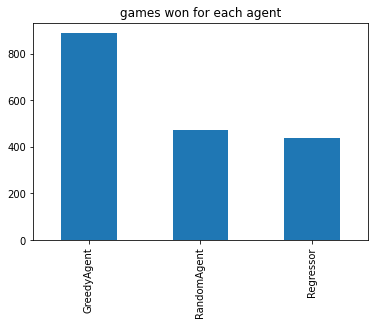

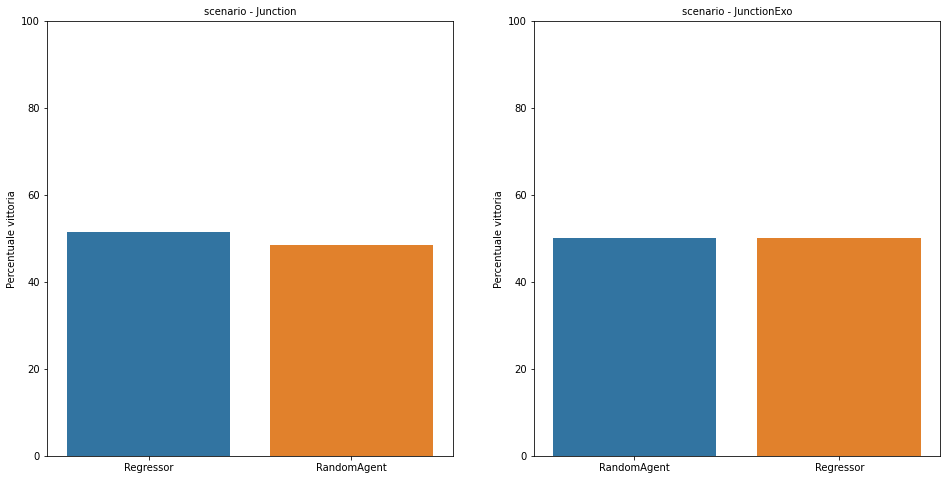

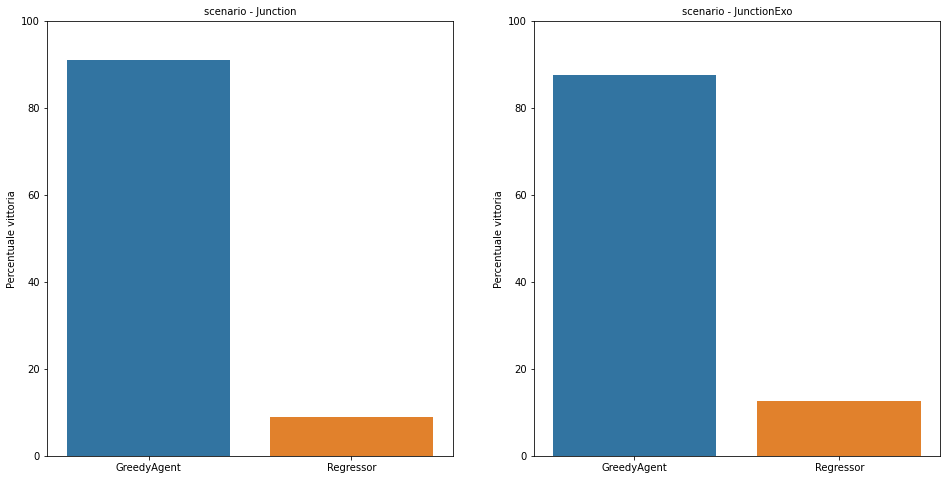

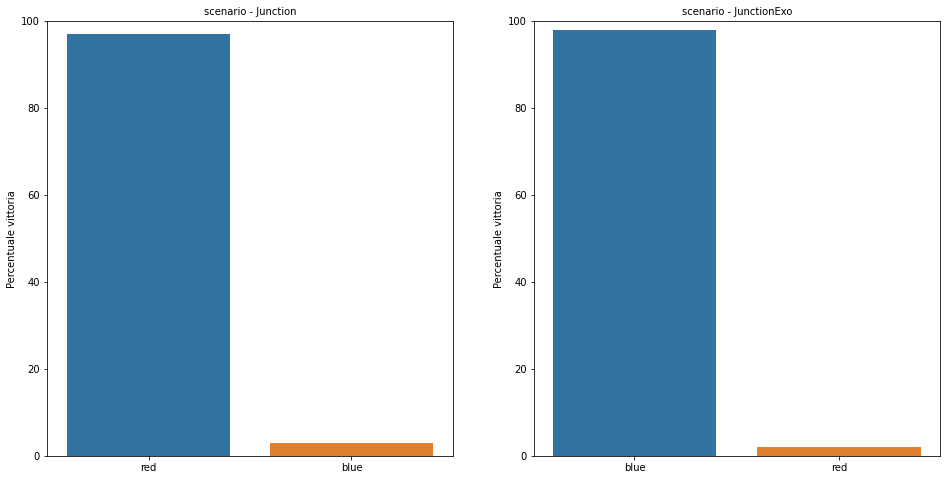

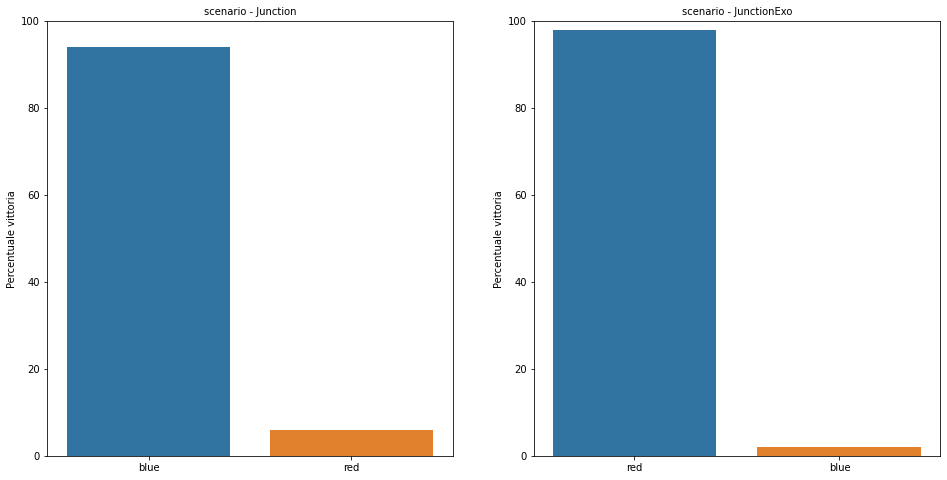

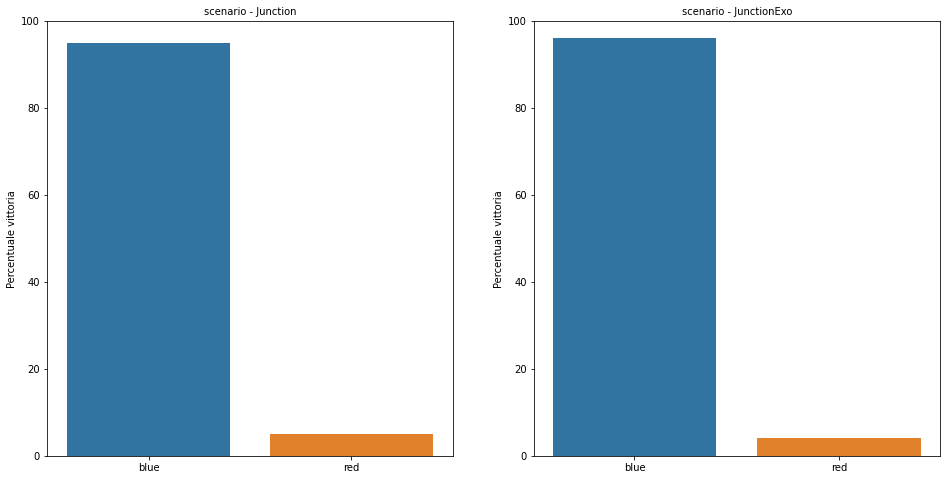

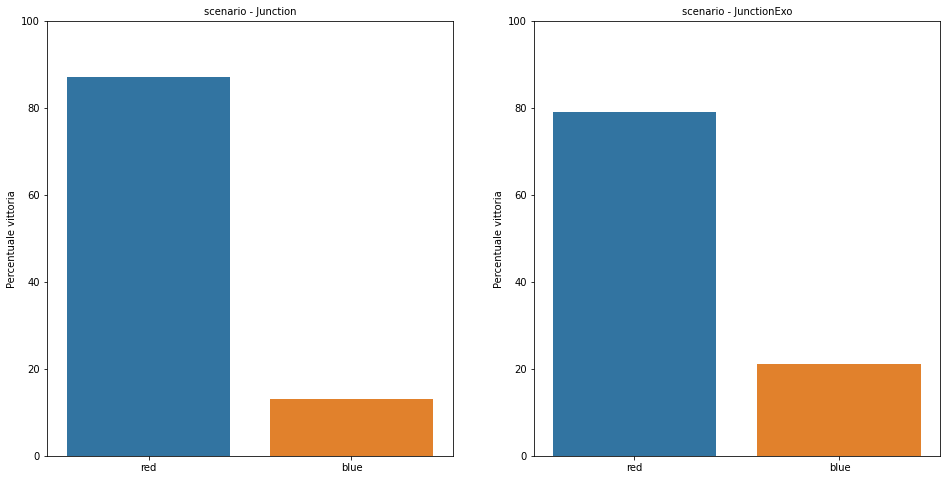

In [10]:
matchesWonForEachAgent(dfAll)
agentVSagent(dfAll,"Regressor","RandomAgent")
agentVSagent(dfAll,"Regressor","GreedyAgent")
agentVSagentColor(dfAll,"Regressor","RandomAgent","red")
agentVSagentColor(dfAll,"Regressor","RandomAgent","blue")
agentVSagentColor(dfAll,"Regressor","GreedyAgent","red")
agentVSagentColor(dfAll,"Regressor","GreedyAgent","blue")




PERCENTUALI GENERALI
Percentuale vincita Regressor: 0.27555555555555555
Percentuale vincita RandomAgent: 0.25555555555555554
Percentuale vincita GreedyAgent: 0.4688888888888889
AGENTE VS AGENTE
Percentuale vincita Regressor su RandomAgent: 0.52
Percentuale vincita Regressor su RandomAgent su scenario Junction: 0.53
Percentuale vincita Regressor su RandomAgent su scenario JunctionExo: 0.51
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Red su RandomAgent Blue: 0.05
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  Junction 0.07
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  JunctionExo 0.03
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Blue su RandomAgent Red: 0.99
Percentuale vincita Regressor Blue su RandomAgent Red su scenario  Junction 0.99
Percentuale vincita Regressor Blue su RandomAgent Red su scenario  JunctionExo 0.99
AGENTE VS AGENTE
Percentuale vincita Regressor su GreedyAgent: 0.22
Percentuale vincita Regressor su G

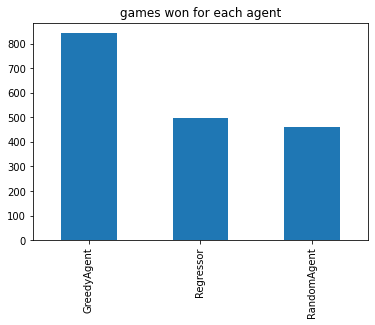

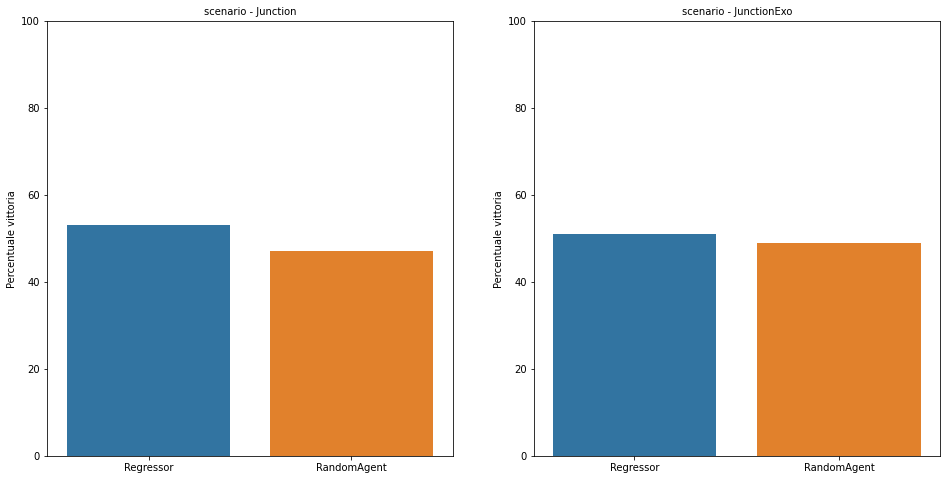

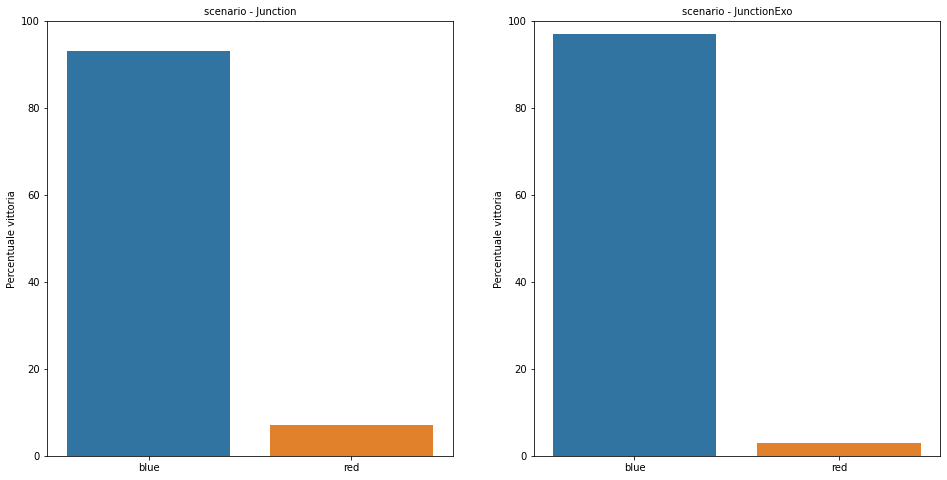

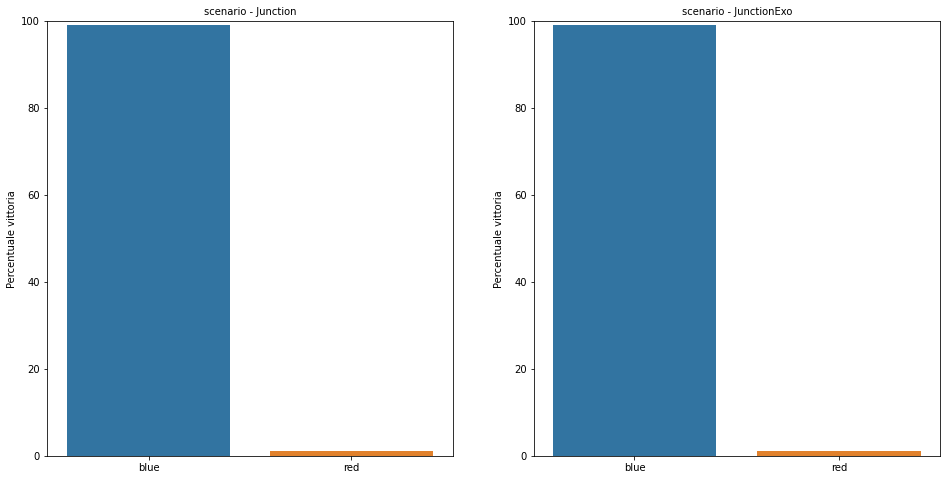

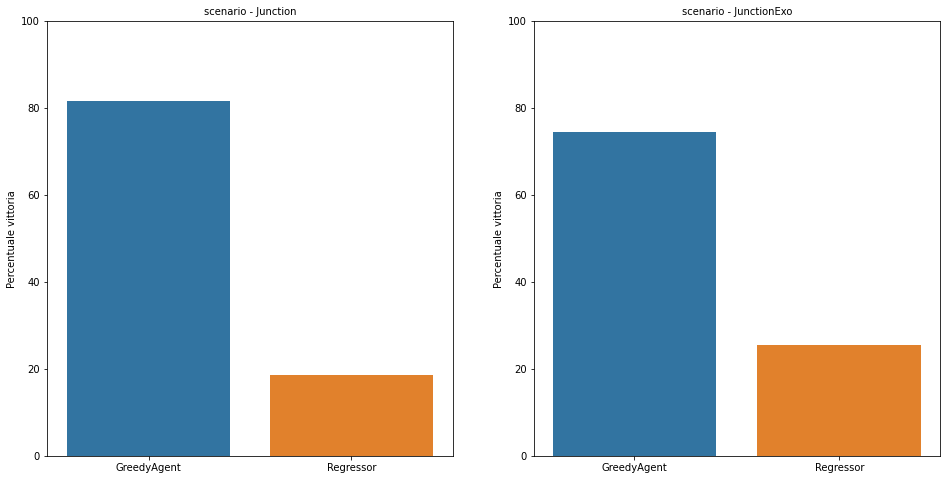

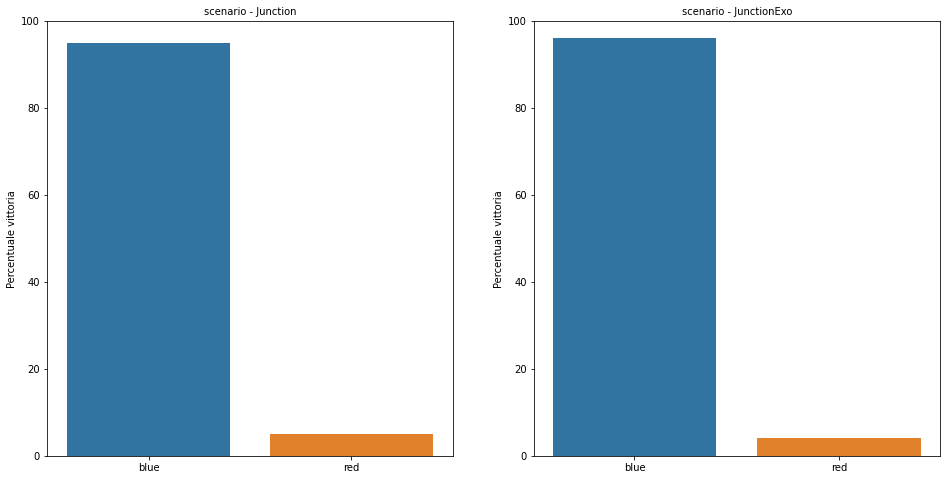

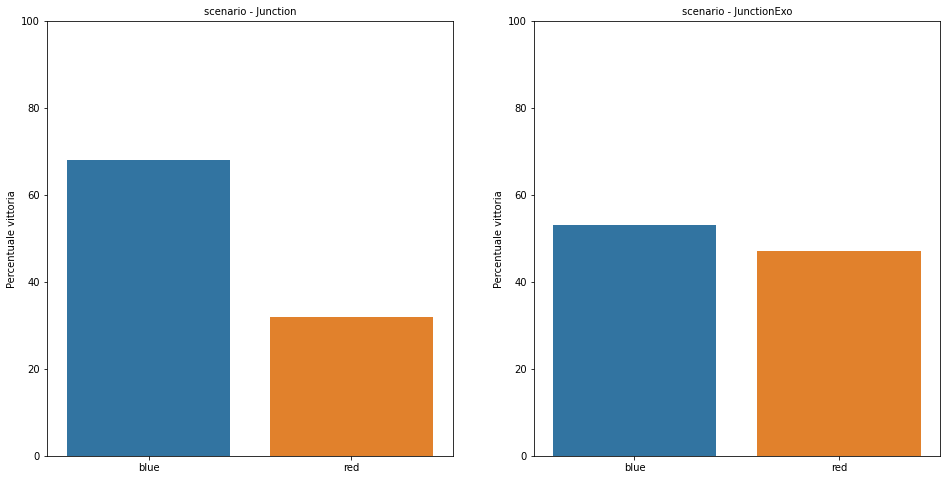

In [11]:
matchesWonForEachAgent(dfGreedy)
agentVSagent(dfGreedy,"Regressor","RandomAgent")
agentVSagentColor(dfGreedy,"Regressor","RandomAgent","red")
agentVSagentColor(dfGreedy,"Regressor","RandomAgent","blue")
agentVSagent(dfGreedy,"Regressor","GreedyAgent")
agentVSagentColor(dfGreedy,"Regressor","GreedyAgent","red")
agentVSagentColor(dfGreedy,"Regressor","GreedyAgent","blue")


PERCENTUALI GENERALI
Percentuale vincita Regressor: 0.2627777777777778
Percentuale vincita RandomAgent: 0.25722222222222224
Percentuale vincita GreedyAgent: 0.48
AGENTE VS AGENTE
Percentuale vincita Regressor su RandomAgent: 0.5125
Percentuale vincita Regressor su RandomAgent su scenario Junction: 0.515
Percentuale vincita Regressor su RandomAgent su scenario JunctionExo: 0.51
AGENTE VS AGENTE
Percentuale vincita Regressor su GreedyAgent: 0.17
Percentuale vincita Regressor su GreedyAgent su scenario Junction: 0.09
Percentuale vincita Regressor su GreedyAgent su scenario JunctionExo: 0.25
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Red su RandomAgent Blue: 0.03
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  Junction 0.04
Percentuale vincita Regressor Red su RandomAgent Blue su scenario  JunctionExo 0.02
AGENTE VS AGENTE PER COLORE
Percentuale vincita Regressor Blue su RandomAgent Red: 0.995
Percentuale vincita Regressor Blue su RandomAgent Red su scenar

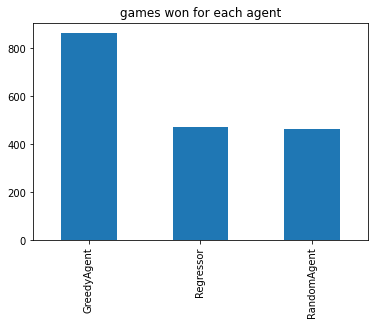

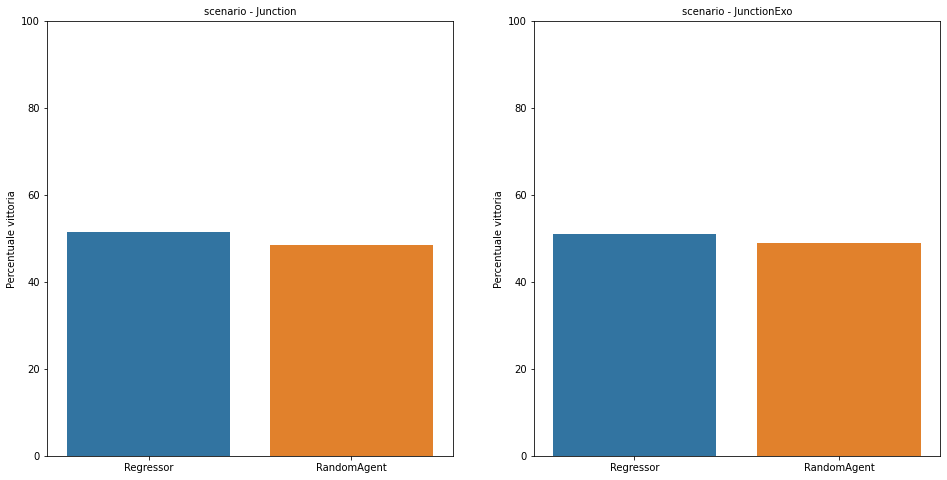

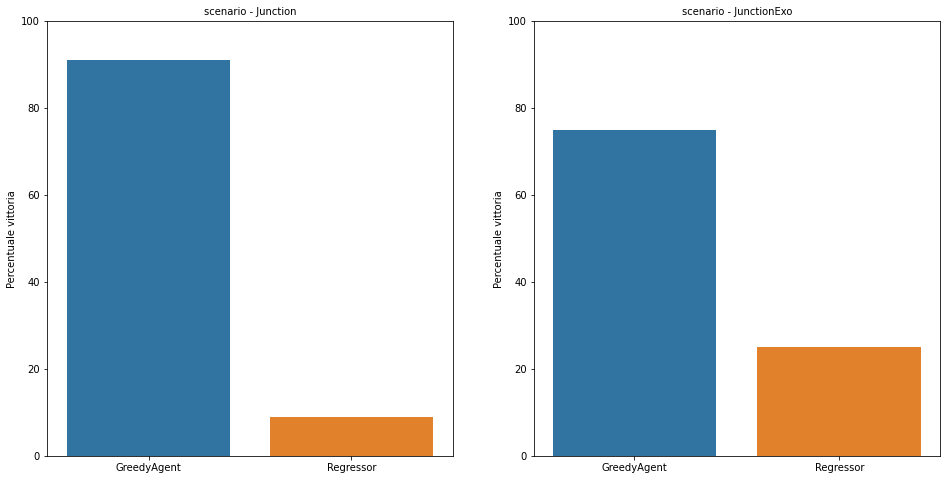

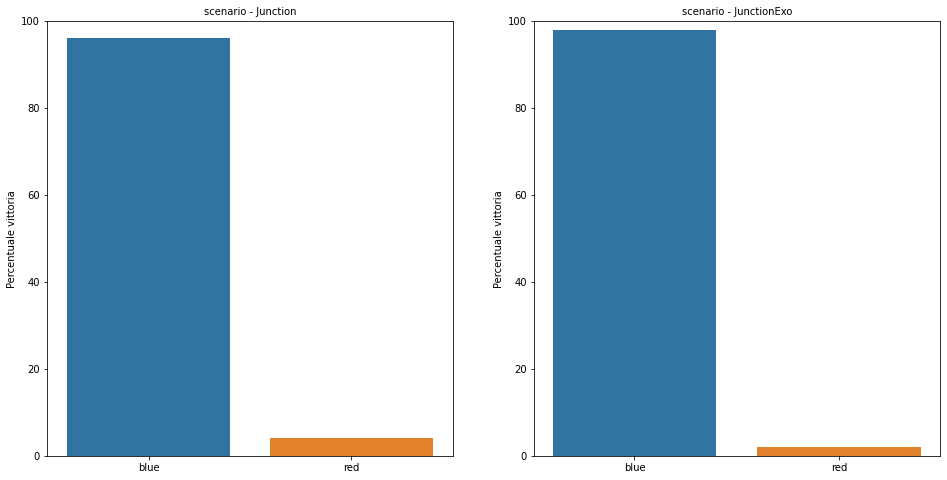

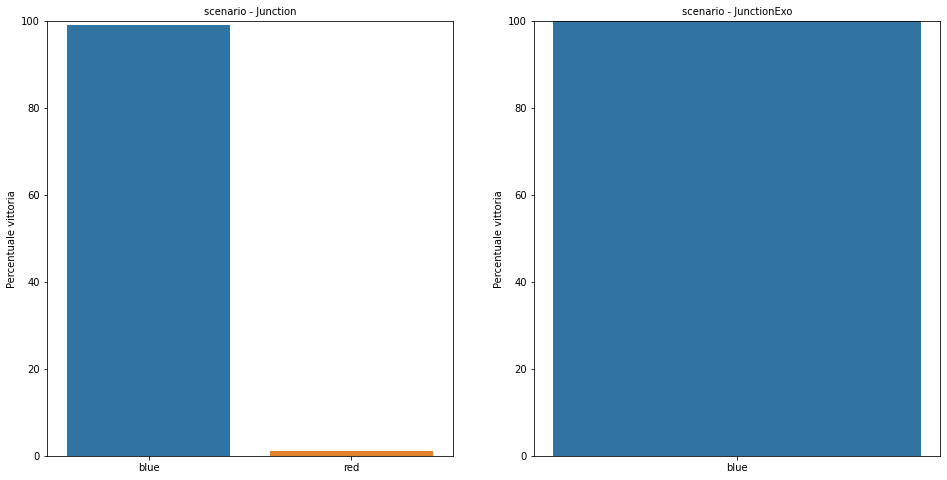

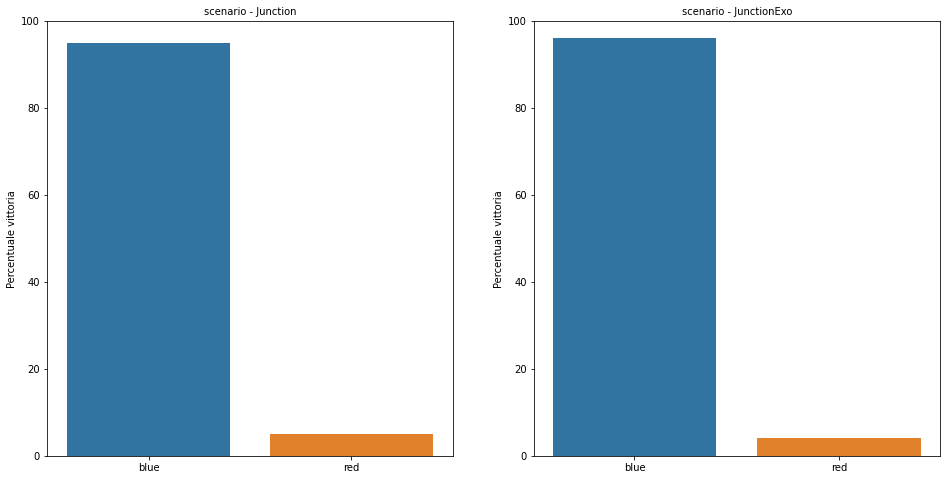

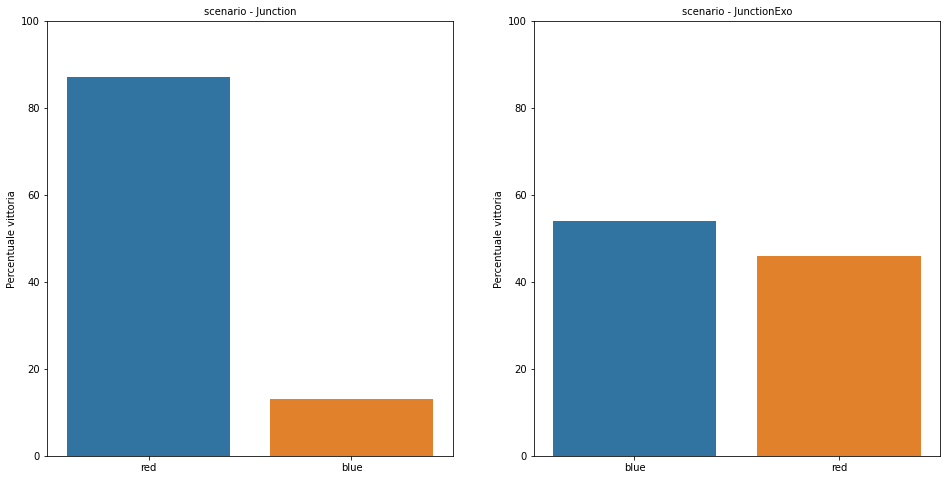

In [12]:
matchesWonForEachAgent(dfGreedyRandom)
agentVSagent(dfGreedyRandom,"Regressor","RandomAgent")
agentVSagent(dfGreedyRandom,"Regressor","GreedyAgent")
agentVSagentColor(dfGreedyRandom,"Regressor","RandomAgent","red")
agentVSagentColor(dfGreedyRandom,"Regressor","RandomAgent","blue")
agentVSagentColor(dfGreedyRandom,"Regressor","GreedyAgent","red")
agentVSagentColor(dfGreedyRandom,"Regressor","GreedyAgent","blue")


In [13]:
#spiegazione del lavoro
